In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')

In [4]:
rfm = pd.read_csv('seg_data2.csv')
rfm.head()

,Segment,CustomerID
0,At risk,703
1,Champions,960
2,Inactive,974
3,Loyal,778
4,Needs Attention,334


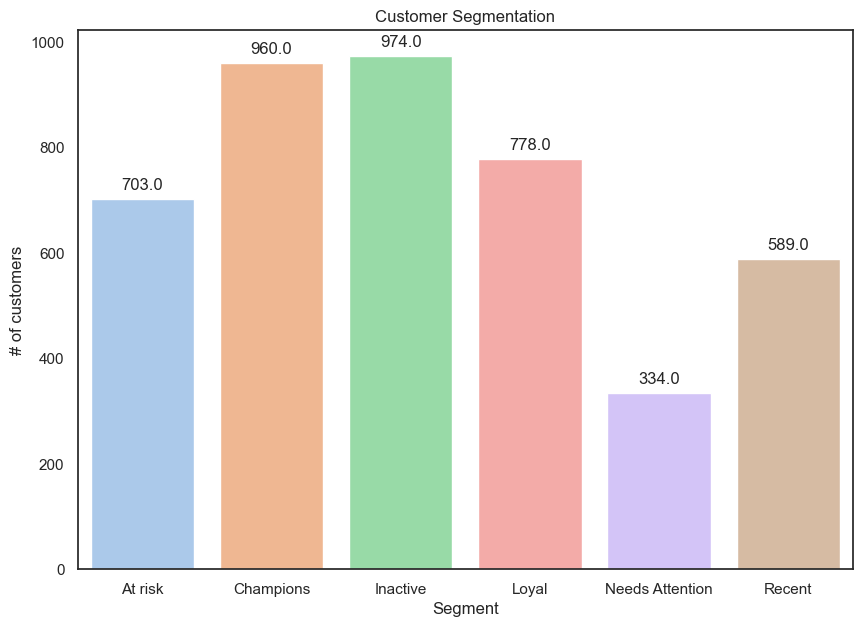

In [44]:
plt.figure(figsize=(10,7))

sns.set(style='white')

ax = sns.barplot(x='Segment', y='CustomerID', data=rfm, palette='pastel')
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('# of customers')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

## 분석

1. Champions 고객이 많지만, 비활동 고객이 가장 많은 것으로 보아 더이상 활동하지 않는 고객들의 재방문을 격려할 수 있는 프로모션이 필요할 것으로 보인다
    - 웰컴 백 쿠폰
2. At risk 고객도 마찬가지로 많은 수가 있기 때문에 충성 고객으로 이어지기 위한 마케팅이 필요하다
    - 쿠폰
    - 할인 프로모션 진행
3. Loyal 고객들을 위해서는 감사 쿠폰 등의 프로모션으로 고객 유지 방안이 필요하다.

In [56]:
rfm2 = pd.read_csv('seg_data1.csv')
rfm2.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,326,1,77183.60,1,1,3,113,Inactive
1,12347,3,7,4310.00,3,3,3,333,Champions
2,12348,76,4,1797.24,2,2,3,223,Recent
3,12349,19,1,1757.55,3,1,3,313,Recent
4,12350,311,1,334.40,1,1,1,111,Inactive


In [50]:
# rfm의 통계
rfm_stat = rfm2[['Recency','Frequency','Monetary','Segment']].groupby('Segment').agg({'mean','std','max','min'}).reset_index()

In [51]:
rfm_stat.head()

Segment    Recency                       Frequency           \
                          std  max min        mean        std  max min   
0          At risk  73.130287  359  27  103.526316   0.816631    6   1   
1        Champions   7.439885   26   1   11.181250  13.920943  209   2   
2         Inactive  79.987216  374  93  236.309035   0.436095    4   1   
3            Loyal  22.433228   92   1   33.061697   3.614359   63   1   
4  Needs Attention  70.417304  373  27  116.874251   2.636652   34   1   

                  Monetary                                  
        mean           std        max     min         mean  
0   1.547653    278.915871    1149.02    6.20   467.986132  
1  10.706250  17978.933169  280206.02  400.86  5998.648469  
2   1.163244   2487.674255   77183.60    3.75   397.662012  
3   4.703085   3433.932571   80850.84   49.80  1743.005040  
4   3.461078   3459.751153   44534.30    6.90  1599.673566

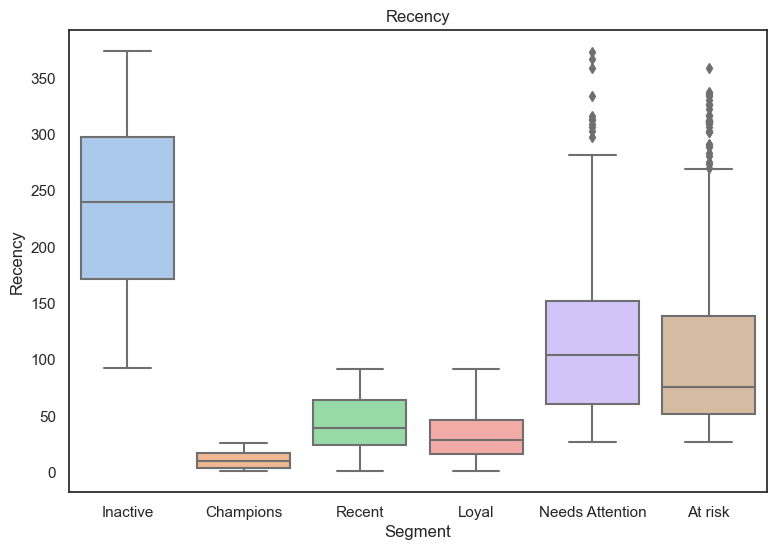

In [64]:
# Recency boxplot
plt.figure(figsize=(9, 6))

sns.boxplot(x='Segment', y='Recency', data=rfm2, palette='pastel')

plt.title('Recency')
plt.xlabel('Segment')
plt.ylabel('Recency')

plt.show()

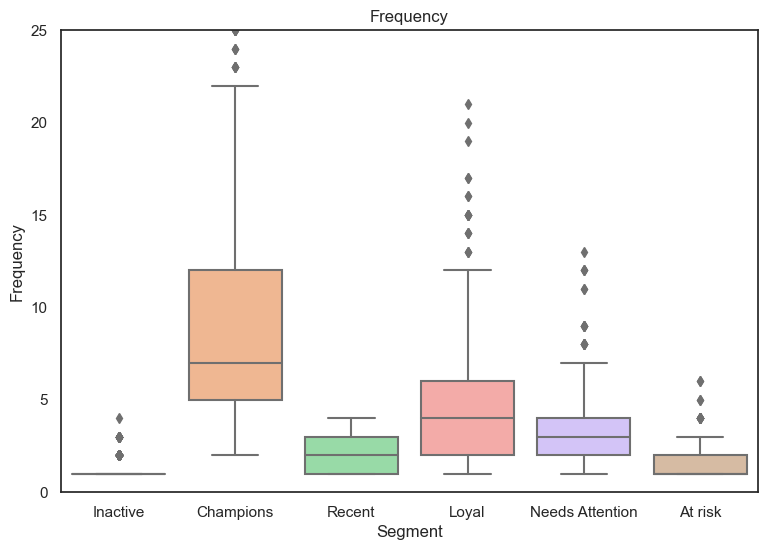

In [70]:
# Frequency boxplot
plt.figure(figsize=(9, 6))

sns.boxplot(x='Segment', y='Frequency', data=rfm2, palette='pastel')

plt.title('Frequency')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.ylim(0,25)

plt.show()

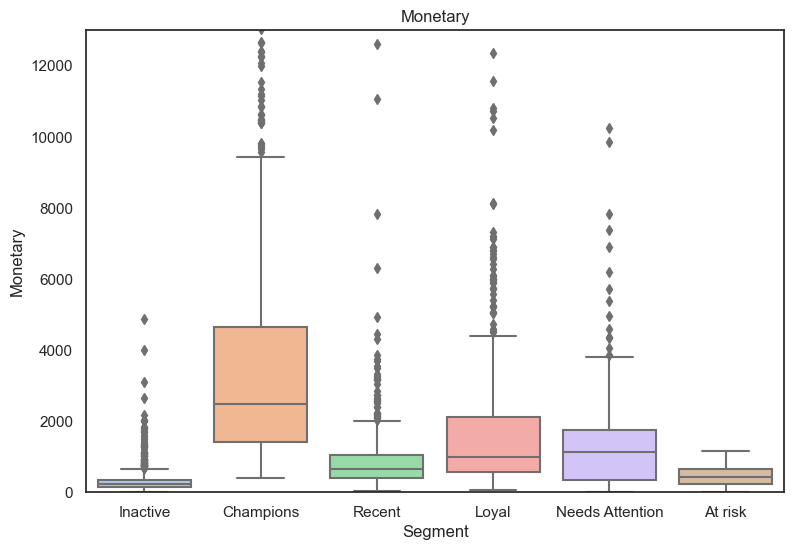

In [76]:
# Monetary boxplot
plt.figure(figsize=(9, 6))

sns.boxplot(x='Segment', y='Monetary', data=rfm2, palette='pastel')

plt.title('Monetary')
plt.xlabel('Segment')
plt.ylabel('Monetary')
plt.ylim(0, 13000)

plt.show()

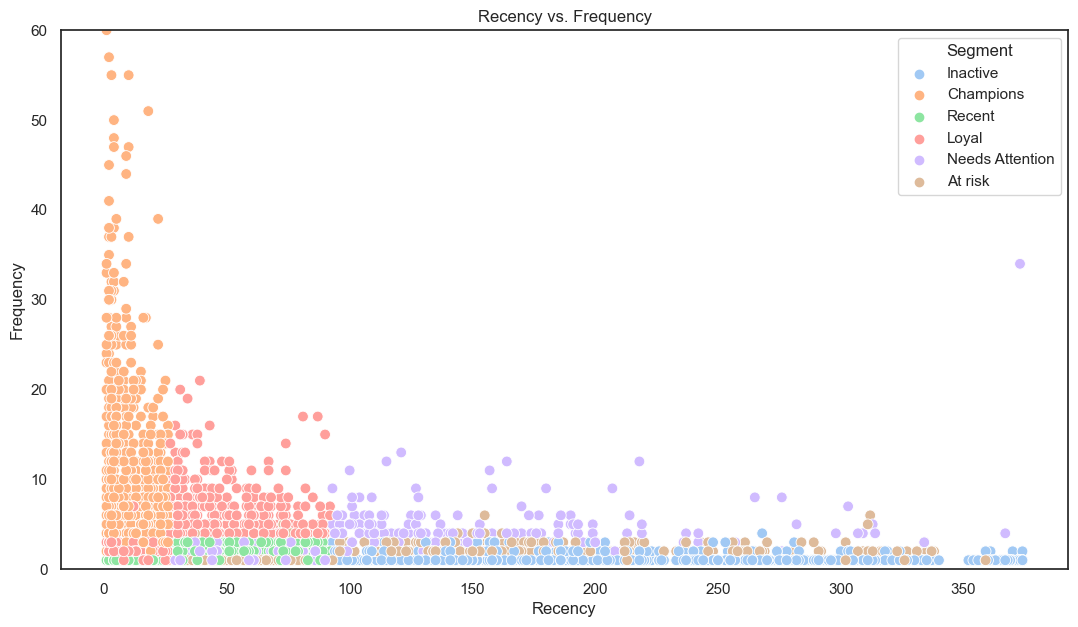

In [87]:
plt.figure(figsize=(13, 7))

sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm2, palette='pastel', s=60)
plt.title('Recency vs. Frequency')
plt.ylabel('Frequency')
plt.xlabel('Recency')
plt.ylim(0, 60)

plt.show()

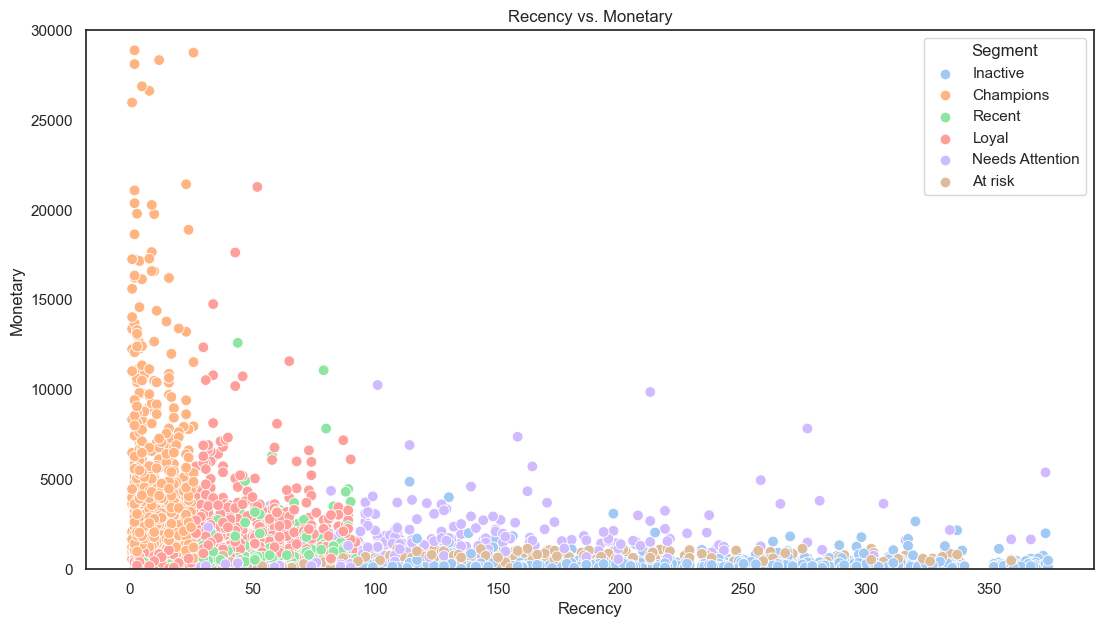

In [91]:
plt.figure(figsize=(13, 7))

sns.scatterplot(x='Recency', y='Monetary', hue='Segment', data=rfm2, palette='pastel', s=60)
plt.title('Recency vs. Monetary')
plt.ylabel('Monetary')
plt.xlabel('Recency')
plt.ylim(0, 30000)

plt.show()

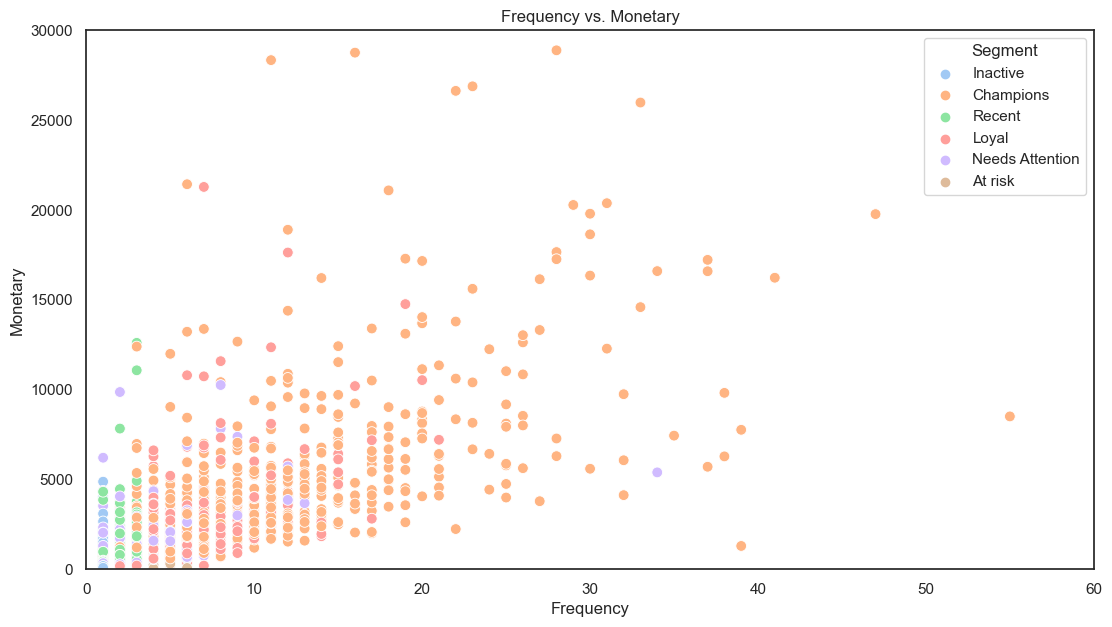

In [95]:
plt.figure(figsize=(13, 7))

sns.scatterplot(x='Frequency', y='Monetary', hue='Segment', data=rfm2, palette='pastel', s=60)
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.ylim(0,30000)
plt.xlim(0, 60)

plt.show()